In [1]:
import pandas as pd

In [30]:
churn_data = pd.read_csv('churn_data.csv')

In [31]:
churn_data.head(2)

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,530.0,two,157.0,3+,no,yes,no,sales,low
1,0.80,860.0,five,262.0,6+,no,yes,no,sales,medium


In [32]:
print(churn_data.shape)

(14999, 10)


In [33]:
duplicated_rows = churn_data.duplicated()

In [34]:
duplicated_rows.sum()

2966

In [35]:
duplicated_part = churn_data[duplicated_rows].sort_values(by=churn_data.columns.tolist())
print(duplicated_part.shape)

(2966, 10)


In [36]:
duplicated_part.iloc[4:10, :]

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
12652,0.09,770.0,six,290.0,4+,no,yes,no,technical,medium
14863,0.09,770.0,six,290.0,4+,no,yes,no,technical,medium
12278,0.09,780.0,six,254.0,4+,no,yes,no,support,low
14489,0.09,780.0,six,254.0,4+,no,yes,no,support,low
12477,0.09,790.0,six,275.0,4+,no,yes,no,sales,low
14688,0.09,790.0,six,275.0,4+,no,yes,no,sales,low


In [37]:
churn_data.drop_duplicates(inplace=True)

In [ ]:
churn_data.shape

(12033, 10)

In [ ]:
churn_data.duplicated().sum()

0

In [3]:
churn_data = pd.read_csv('churn_data.csv')
churn_data = churn_data.drop_duplicates()
churn_data.shape

(12033, 10)

In [7]:
churn_data.isna().sum()
# churn_data.isna().sum()/churn_data.shape[0]*100

,0
satisfaction,9
evaluation,60
number_of_projects,44
average_montly_hours,26
time_spend_company,0
work_accident,0
churn,0
promotion,0
department,41
salary,0


In [8]:
churn_data = churn_data.dropna()

In [9]:
churn_data.shape

(11853, 10)

In [10]:
churn_data = pd.read_csv('churn_data.csv')
churn_data = churn_data.drop_duplicates()

In [11]:
churn_data["satisfaction"] = churn_data["satisfaction"].fillna(churn_data["satisfaction"].mean())

In [12]:
churn_data.isna().sum()

,0
satisfaction,0
evaluation,60
number_of_projects,44
average_montly_hours,26
time_spend_company,0
work_accident,0
churn,0
promotion,0
department,41
salary,0


In [14]:
# dup_cols = churn_data.columns.duplicated()
# churn_data = churn_data.loc[:, ~dup_cols]

<Axes: >

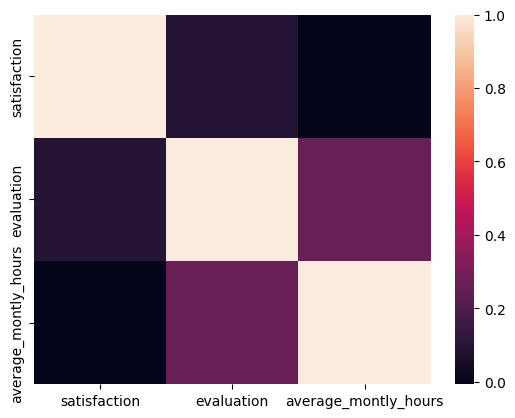

In [40]:
import seaborn as sns
churn_num = churn_data.select_dtypes(include=['int64', 'float64'])
sns.heatmap(churn_num.corr())

In [45]:
num_cols = churn_num.columns.tolist()
for col in num_cols:
  churn_num[col] = churn_num[col].fillna(churn_num[col].mean())

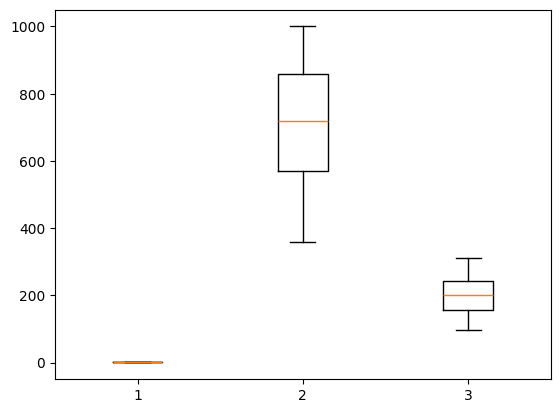

In [46]:
import matplotlib.pyplot as plt
plt.boxplot(churn_num)
plt.show()

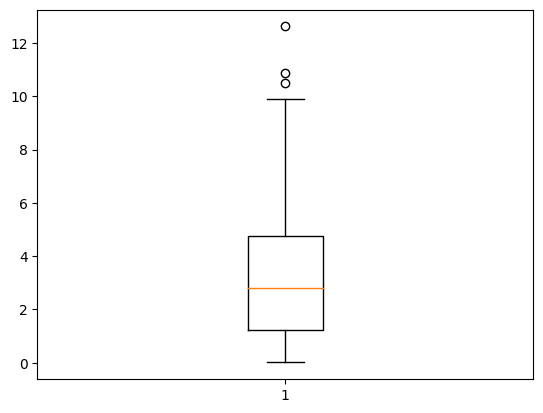

In [ ]:
import matplotlib.pyplot as plt
repay_loans = pd.read_csv("repay_loans.csv").dropna()
repay_loans.head(2)
rate = repay_loans["rate"]
plt.boxplot(rate)
plt.show()

In [ ]:
import numpy as np
q1 = np.quantile(rate, 0.25)
q3 = np.quantile(rate, 0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

In [ ]:
repay_loans = repay_loans[repay_loans["rate"]<upper_bound]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc976d3d630>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc976d3f310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc970408ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc976d3d3c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc976d3d7b0>],
 'means': []}

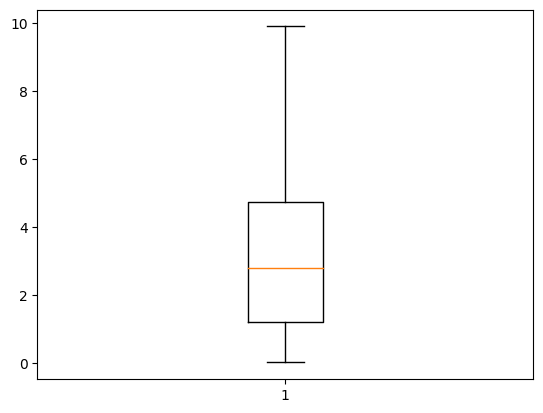

In [ ]:
plt.boxplot(repay_loans["rate"])

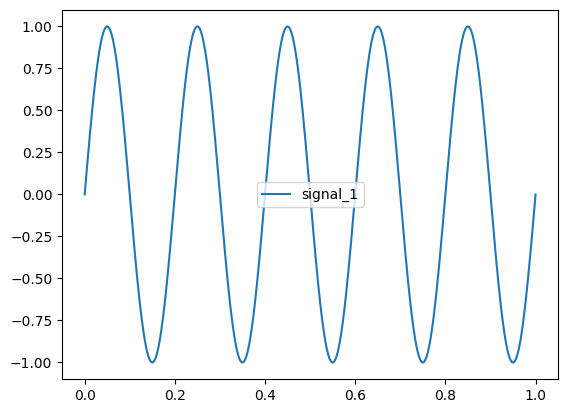

In [ ]:
t = np.linspace(0, 1, 1000)
signal_1 = np.sin(2*np.pi*5*t)
plt.plot(t, signal_1, label="signal_1")
plt.legend()
plt.show()

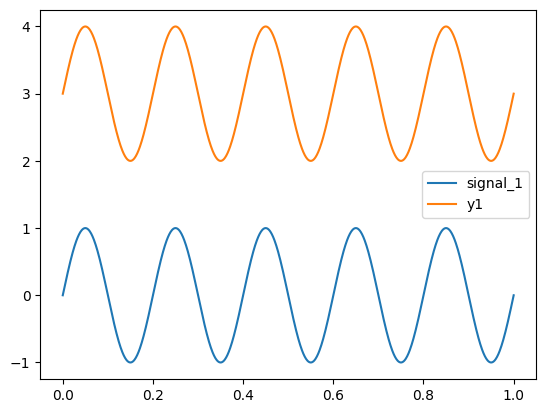

In [ ]:
y1 = 3+signal_1
plt.plot(t, signal_1, label="signal_1")
plt.plot(t, y1, label="y1")
plt.legend()
plt.show()

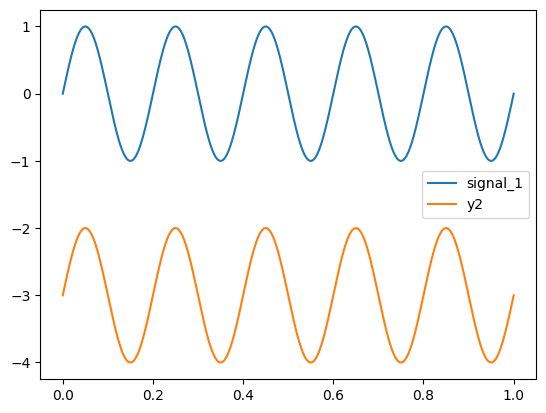

In [ ]:
y2 = signal_1-3
plt.plot(t, signal_1, label="signal_1")
plt.plot(t, y2, label="y2")
plt.legend()
plt.show()

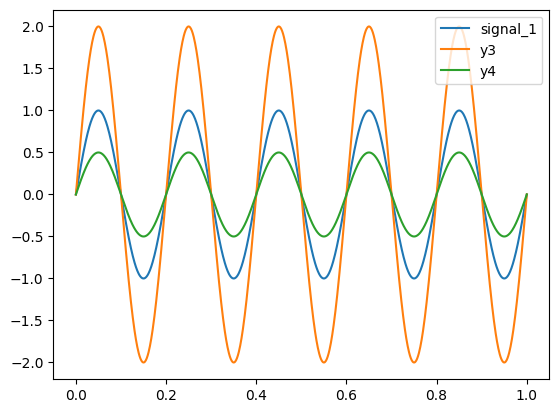

In [ ]:
y3 = signal_1*2
y4 = signal_1*0.5
plt.plot(t, signal_1, label="signal_1")
plt.plot(t, y3, label="y3")
plt.plot(t, y4, label="y4")
plt.legend()

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

scale_slider = widgets.FloatSlider(value=1, min=0.0, max=5, step=0.1, description='Scale:')
shift_slider = widgets.FloatSlider(value=0, min=-5, max=5, step=0.1, description='Shift:')

output_plot = widgets.Output()

def update_plot(change):
    with output_plot:
        clear_output(wait=True)  # Clear the previous plot
        scaled_y1 = scale_slider.value * signal_1 + shift_slider.value
        plt.plot(t, scaled_y1)
        plt.xlabel('t')
        plt.ylabel('transformed signal')
        plt.title('Shifted and Scaled signal_1')
        plt.grid(True)
        plt.ylim([-10, 10])
        plt.show()

scale_slider.observe(update_plot, 'value')
shift_slider.observe(update_plot, 'value')

display(scale_slider, shift_slider, output_plot)
update_plot(None)

FloatSlider(value=1.0, description='Scale:', max=5.0)

FloatSlider(value=0.0, description='Shift:', max=5.0, min=-5.0)

Output()

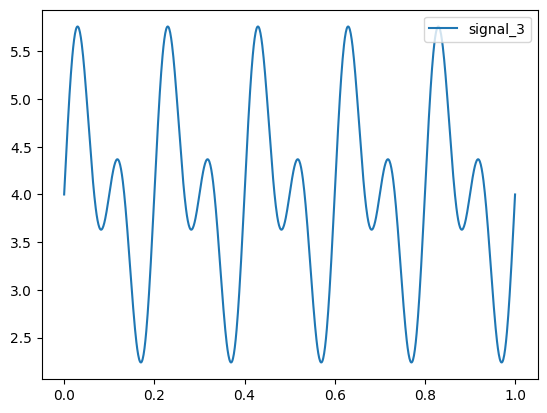

In [ ]:
t = np.linspace(0, 1, 1000)
signal_1 = np.sin(2*np.pi*5*t)
signal_2 = np.sin(2*np.pi*10*t)
signal_3 = signal_1+signal_2+4
plt.plot(t, signal_3, label="signal_3")
plt.legend()
plt.show()

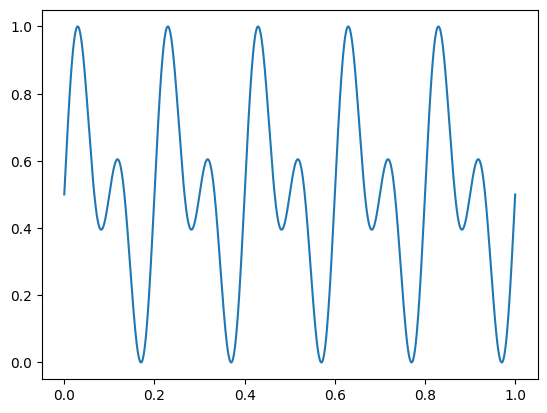

In [ ]:
y_scaled = (signal_3-min(signal_3))/(max(signal_3)-min(signal_3))
plt.plot(t, y_scaled)
plt.show()

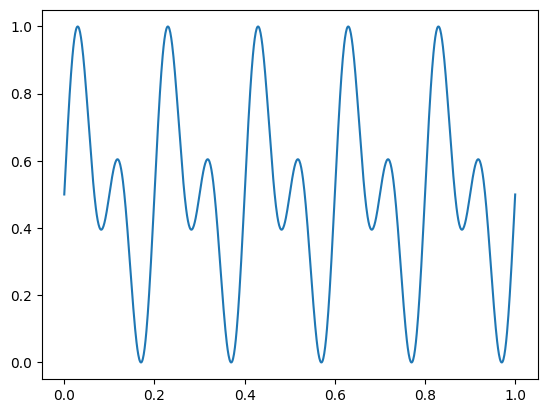

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
signal_3 = signal_3.reshape(-1, 1)
scaler.fit(signal_3)
y_scaled_lib = scaler.transform(signal_3)
plt.plot(t, y_scaled_lib)
plt.show()

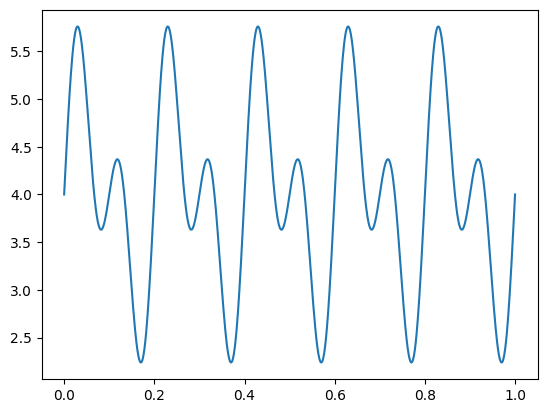

In [ ]:
plt.plot(t, signal_3)

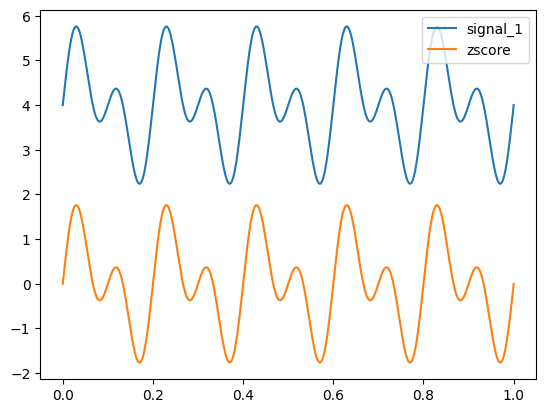

In [ ]:
# z = (x-u)/s Also known as z-score
zscore = (signal_3-np.mean(signal_3))/np.std(signal_3)
plt.plot(t, signal_3, label="signal_1")
plt.plot(t, zscore, label="zscore")
plt.legend()

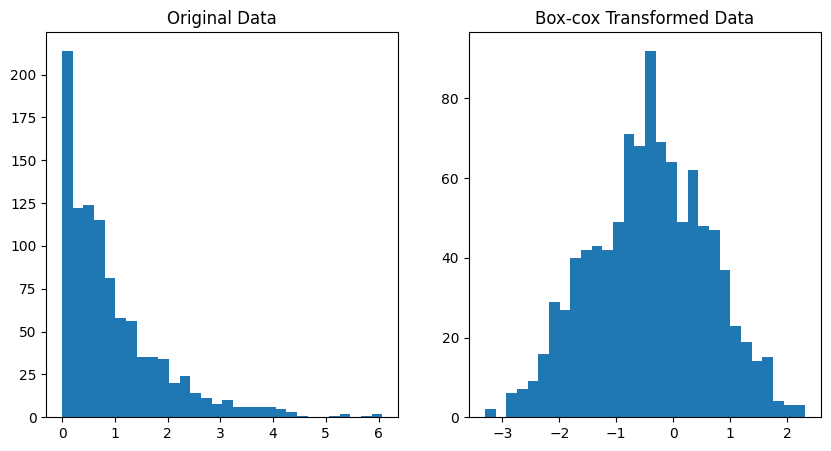

In [ ]:
from scipy import stats
data = np.random.exponential(scale=1, size=1000)
transformed_data, lamda_value = stats.boxcox(data)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(data, bins=30)
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=30)
plt.title('Box-cox Transformed Data')

plt.show()

In [ ]:
data = {'color': ['yellow', 'green', 'blue', 'yellow', 'green']}
df = pd.DataFrame(data)
df

,color
0,yellow
1,green
2,blue
3,yellow
4,green


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

encoded_data = encoder.fit_transform(df[['color']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['color']))
final_df = pd.concat([df, encoded_df], axis=1)
final_df

,color,color_blue,color_green,color_yellow
0,yellow,0.0,0.0,1.0
1,green,0.0,1.0,0.0
2,blue,1.0,0.0,0.0
3,yellow,0.0,0.0,1.0
4,green,0.0,1.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

data = {'color': ['yellow', 'green', 'blue', 'yellow', 'green']}
df = pd.DataFrame(data)
df

label_encoder = LabelEncoder()
df['color_encoded'] = label_encoder.fit_transform(df['color'])
df

,color,color_encoded
0,yellow,2
1,green,1
2,blue,0
3,yellow,2
4,green,1


In [ ]:
# pip install pandas-profiling
# pip install pydantic-settings

In [ ]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(churn_data, title="Pandas Profiling Report")
# profile.to_file("report.html")

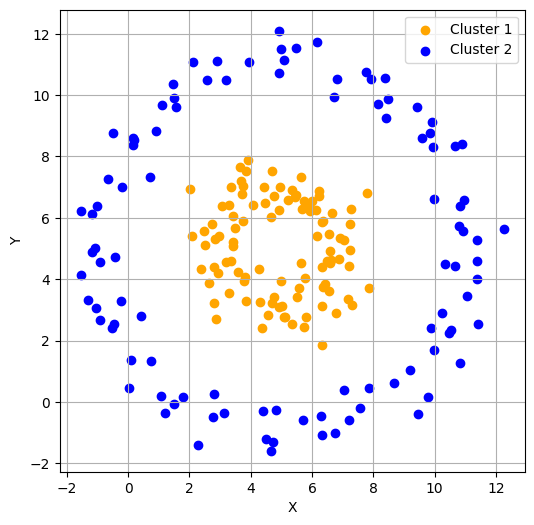

In [ ]:
num_points = 100
radius1 = 2
radius2 = 6
angles = np.linspace(0, 2 * np.pi, num_points)

x1 = 5 + radius1 * np.cos(angles) + np.random.normal(0, 0.5, num_points)
y1 = 5 + radius1 * np.sin(angles) + np.random.normal(0, 0.5, num_points)
x2 = 5 + radius2 * np.cos(angles) + np.random.normal(0, 0.5, num_points)
y2 = 5 + radius2 * np.sin(angles) + np.random.normal(0, 0.5, num_points)

plt.figure(figsize=(6, 6))
plt.scatter(x1, y1, c="orange", label="Cluster 1")
plt.scatter(x2, y2, c="blue", label="Cluster 2")

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

In [ ]:
df1 = pd.DataFrame({'x': x1, 'y': y1, 'class': 'A'})
df2 = pd.DataFrame({'x': x2, 'y': y2, 'class': 'B'})
dummy_data = pd.concat([df1, df2], ignore_index=True).sample(frac=1)
dummy_data.head()

,x,y,class
110,9.597611,8.597193,B
4,5.885342,6.432012,A
139,0.169129,8.372733,B
126,4.974861,11.513221,B
17,5.220818,6.588341,A


In [ ]:
dummy_data["rad"] = np.sqrt((dummy_data["x"] - 5)**2 + (dummy_data["y"] - 5)**2)

In [ ]:
dummy_data.head()

,x,y,class,rad
110,9.597611,8.597193,B,5.837621
4,5.885342,6.432012,A,1.683594
139,0.169129,8.372733,B,5.891744
126,4.974861,11.513221,B,6.513269
17,5.220818,6.588341,A,1.603617


<Axes: ylabel='rad'>

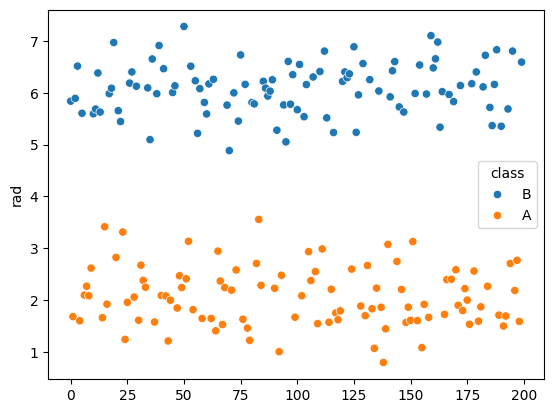

In [ ]:
import seaborn as sns
sns.scatterplot(data=dummy_data, x=np.arange(200), y='rad', hue='class')